# Dragon Real Estate - Price Prediction Project  
## given the features of a house, we want to predict its price



In [1]:
import pandas as pd #importing pandas library for data science

In [2]:
housing = pd.read_csv(r"C:\Users\riav5\OneDrive\data science practice\MLProject1\housingdata.csv") #save data in dataframe after importing it  

In [3]:
housing.columns = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE",
    "DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"
] #had to manually add in the header columns here as well since it was not reading them from the csv file, troubleshooted error using AI


In [4]:
housing.head() #shows the first 5 rows of our data so we get a better understanding of it 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [5]:
housing.info() #tells us how many entries,values etc and missing data , in terms of machine learning this dataset is smaller 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [6]:
housing['CHAS'].value_counts() #this will tell us information about this specific column in the data which is CHAS, tells us # of 1s and # of 0s in the data 

CHAS
0    470
1     35
Name: count, dtype: int64

In [7]:
housing.describe() #tells us key things about the data , CRIM tells us null counts, percentiles mean 75% of vals are less than this

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##^I want to see my graphs right here directly in this notebook

In [8]:
%matplotlib inline     

In [9]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

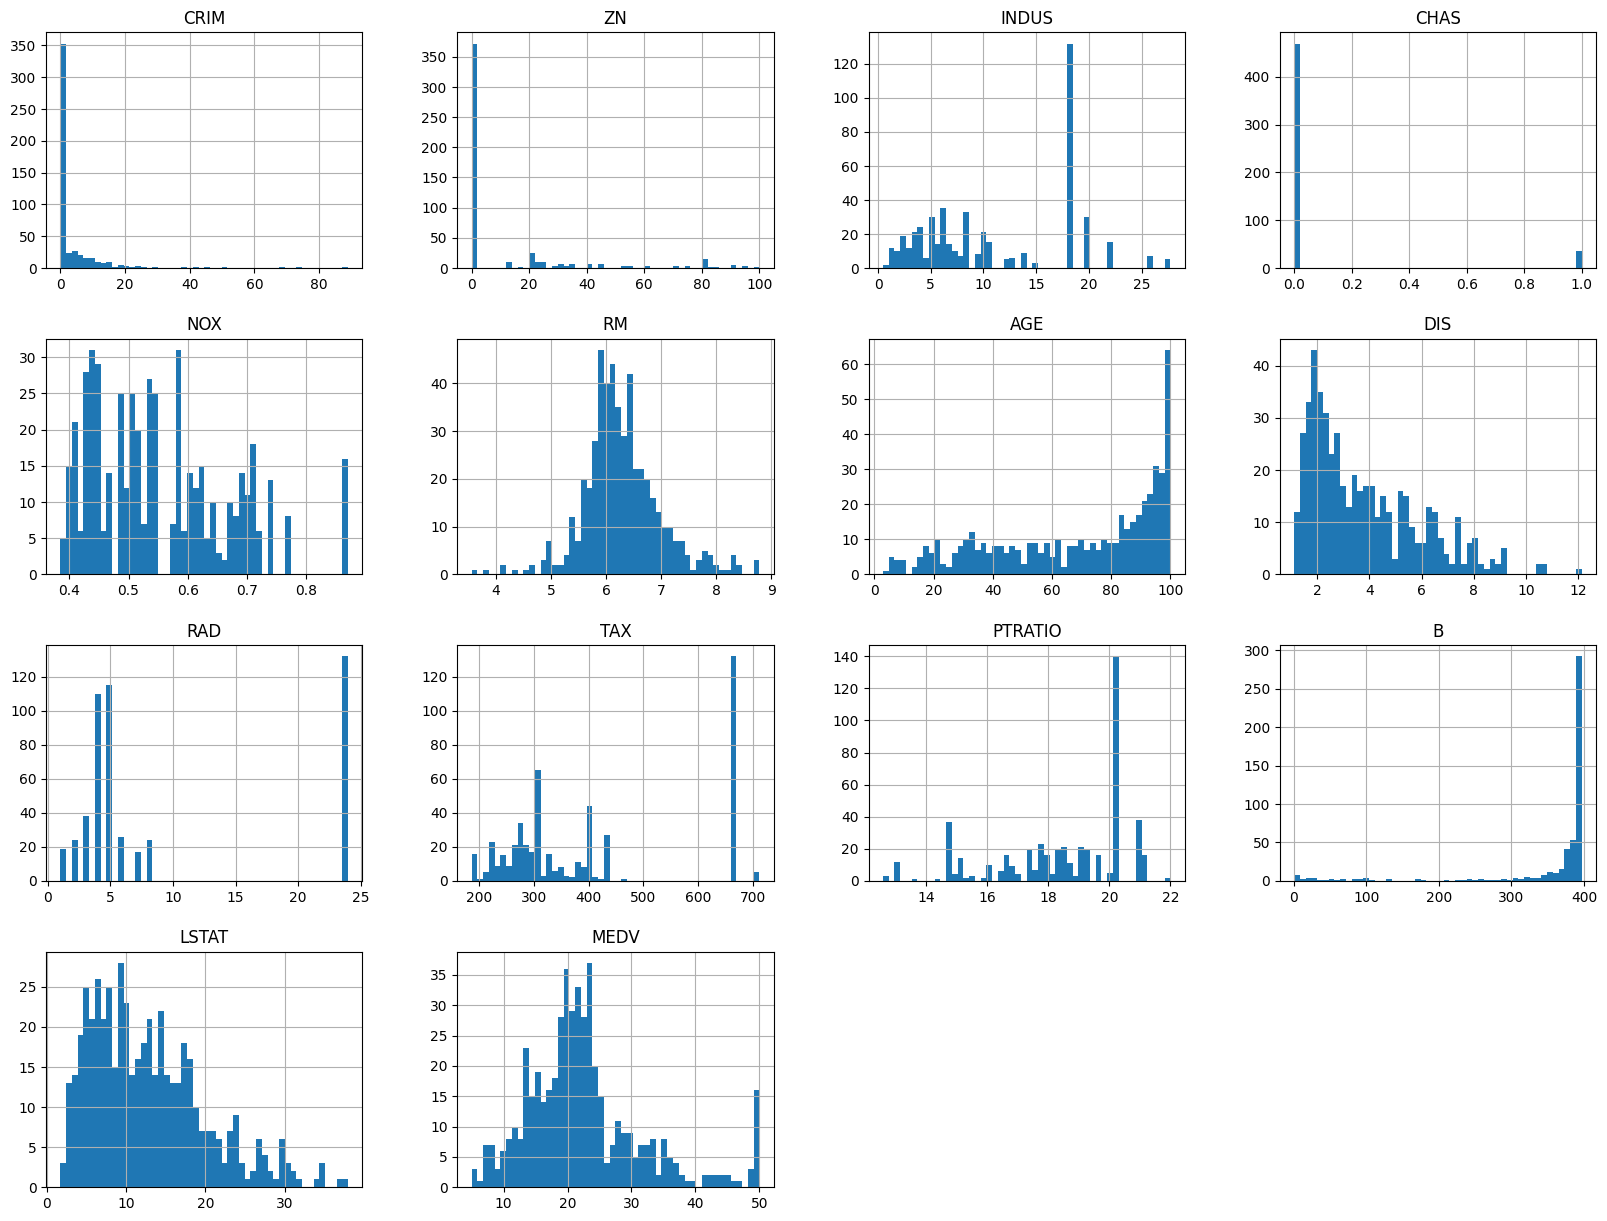

In [10]:
housing.hist(bins=50,figsize=(20,15)) #this generates histograms for us so we can visualize the data all in one step

An insight we can get from the AGE plot is the majority of houses (60 observations about) are 100 years old. Most of the observations of houses are from older homes. CHAS has a lot of 0 values and a little bit of 1 values. CRIM (per capita crime rate by town), we can see that most of the crime rates are super low starting off at the highest count at 0 and there only a few houses in a place where crime rate is super high (60s - 80s). We can see that the MEDV (median value of owner occupied homes in $1000s) is mostly between 20,000 and 30,0000 and maybe even 13,000.

In machine learning, you have to keep some data on the side so that you can do testing and training so at the start I looked at all of the data and made plots, histograms etc with all the data, but later on(now) we will only be using a small part to train and test the model. Model will be overfitted if you keep training and testing on the full dataset because your model will be a overly perfect fit for only all of the data with an error of 0 (not good). So when you get new data, the predictions will not be accurate. Now will make a test set for the machine learning.

We have to make the test set and not look at it, then only work with the training data to train the model. It is important to not look at test set too much because then we start to notice patterns and are biased in the algorithm we are making since we want it to work for our specific test data. Not the right approach

# Train-Test Splitting

The purpose of train test splitting is to split the data into two sets one for testing and one for training. These should be completely separate/indepedent of each other.

In [11]:
#For learning purpose we did not really (use) this method here 
import numpy as np #used numpy here
def split_train_test(data, test_ratio):
    np.random.seed(42) #because of this, the shuffled values get fixed which is what we want because if we just keep doing it random it chooses new values for shuffled and then the model can see all the data  
    shuffled = np.random.permutation(len(data)) #will shuffle a random permutation based on the length of our data
    test_set_size = int(len(data) *test_ratio) # obviously most of our data should be used for training the model, 80-20 ratio is usually the best
    test_indices = shuffled[:test_set_size]  #which data will come in the test indices: from the start until the size of the test set 
    train_indices = shuffled[test_set_size:] #for the training, we will go from where the test indices ended to the end of the full dataset 
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
#train_set, test_set = split_train_test(housing,0.2) # we want our train and test set to come from the function so we set it equal, chose a test ratio of 0.2 that means 20% of our data is used for testing and 80% for training 

In [13]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n" ) #used an f string and we want to check the amount of rows that we are testing versus training with, should be a 20:80 ratio

Actually this function split train test is already available in sci kit learn but this is how its supposed to work in the backend, its already available to import in scikit learn itself which makes it easier for us. 

In [14]:
#this function is already available in sci kit learn, so we are using this one here 
from sklearn.model_selection import train_test_split #importing this from sci kit learn
train_set,test_set = train_test_split(housing,test_size = 0.2,random_state = 42) #these are the parameters for the function its the data, size/percent of data for testing, and the random seed which we put as 42 
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n" ) #used an f string and we want to check the amount of rows that we are testing versus training with, should be a 20:80 ratio

Rows in train set: 404
Rows in test set: 101



Issue: there is an issue with the splitting though, because we want to make sure that every attribute gets evenly distributed in the train and test set. For example, the CHAS we saw in value counts that there are only 35 houses with a CHAS of 1. What if all of those values go into the test set and our train set doesn't even know that there can be 1 as a value for CHAS. This is bad for the model. For this issue, we have to use stratified sampling for our data so that the train and test sets represent the whole population of data.

This is called stratified shuffle split in sci-kit learn. 

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit #google search for info on function in sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2,random_state=42) #want the number splits to be 1, size of testing data to be 0.2, and random seed as 42 
for train_index, test_index in split.split(housing,housing['CHAS']): #want to do the split based off of attribute CHAS because we want both the 0s and 1s to be represented 
    strat_train_set = housing.loc[train_index] #loc is a data function
    strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set #now we can see our testing set which is 20% of the data 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
176,0.05425,0.0,4.05,0,0.510,6.315,73.4,3.3175,5,296,16.6,395.60,6.29,24.6
284,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,22.0
223,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
87,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
261,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05302,0.0,3.41,0,0.489,7.079,63.1,3.4145,2,270,17.8,396.06,5.70,28.7
466,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666,20.2,331.29,21.32,19.1
52,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43,23.4
504,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [17]:
strat_test_set.describe() #we can even describe the test set and get more info on it such as how large it is etc 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.380402,15.995050,10.547426,0.069307,0.544544,6.413772,68.715842,3.858099,9.019802,396.584158,18.298020,368.881287,12.008119,23.266337
std,9.957745,27.945169,7.007952,0.255242,0.113916,0.747622,27.263007,2.042402,8.538126,170.514707,2.338161,73.674238,6.892168,9.405586
min,0.010960,0.000000,0.460000,0.000000,0.389000,4.368000,7.800000,1.316300,1.000000,188.000000,12.600000,2.520000,2.970000,6.300000
25%,0.050230,0.000000,4.950000,0.000000,0.447000,5.963000,45.700000,2.122400,4.000000,270.000000,16.800000,380.020000,6.580000,18.500000
50%,0.178990,0.000000,8.140000,0.000000,0.515000,6.297000,77.800000,3.317500,5.000000,307.000000,19.100000,393.680000,10.260000,21.500000
75%,2.446680,21.000000,18.100000,0.000000,0.614000,6.750000,91.900000,5.491700,8.000000,666.000000,20.200000,396.900000,16.960000,27.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.704000,100.000000,8.696600,24.000000,711.000000,21.200000,396.900000,30.630000,50.000000


In [18]:
strat_test_set['CHAS'].value_counts() #want to see how many 0s and 1s we have in the data 

CHAS
0    94
1     7
Name: count, dtype: int64

In [19]:
strat_train_set #can do the same thing with the training set 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16,11.7
98,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
455,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01,12.7


In [20]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 215
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [21]:
strat_train_set['CHAS'].value_counts() #check to see if the ratio of 0s to 1s in train and test set is similar (376/28 = 94/7 almost same so it worked)

CHAS
0    376
1     28
Name: count, dtype: int64

In [22]:
housing = strat_train_set.copy() #we want to set the data to the train set so we can do our correlation graphs and etc based off of just the train set data 

# Looking for Correlations

In [23]:
corr_matrix = housing.corr() #pandas dataframe function (dataframe.corr) 

In [24]:
corr_matrix['MEDV'].sort_values(ascending=False) #correlation coefficient: if you increase one thing, will the other decrease or increase 

MEDV       1.000000
RM         0.660761
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
LSTAT     -0.739129
Name: MEDV, dtype: float64

1 means a strong positive correlation coefficient and -1 means strong negative correlation. - if you increase RM(# of rooms), then the price of the house will increase

Example: LSTAT has a strong negative correlation, LSTAT is the % of lower status of population. If the percentage of lower status population is less, then the price of the house will be greater. Now we can make some correlation plots using pandas plotting.

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='B', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='B', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>,
        <Axes: xlabel='B', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='B', ylabel='LSTAT'>],
       [<Axes: xlabel='MEDV', ylabel='B'>,
        <Axes: xlabel='RM', ylabel='B'>, <Axes: xlabel='ZN', ylabel='B'>

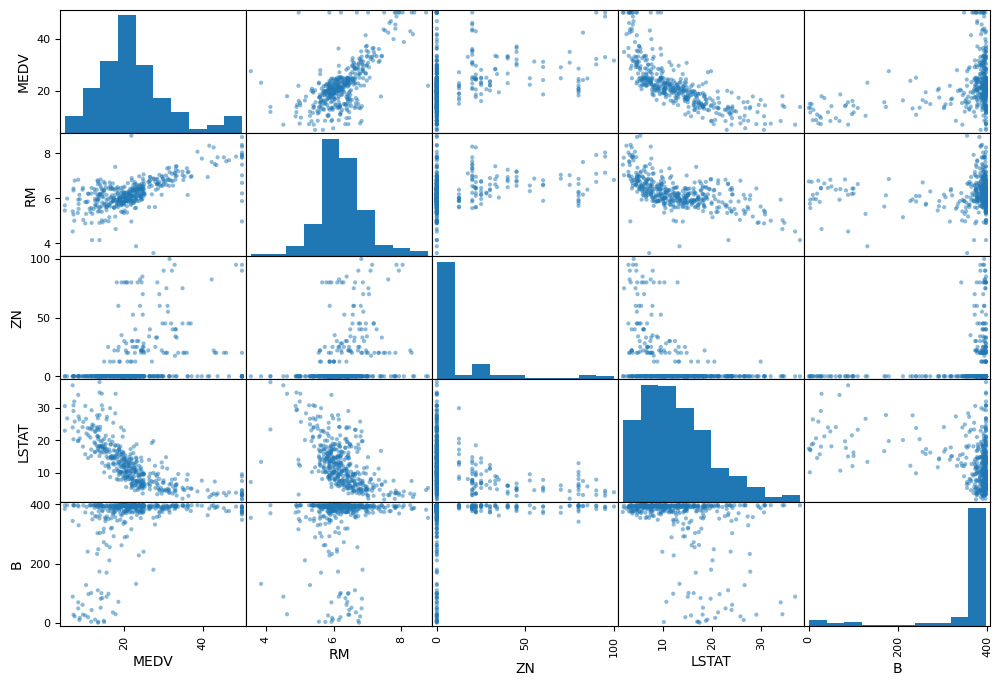

In [25]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT","B"] #checking the correlation of these specific ones in scatter plots
scatter_matrix(housing[attributes],figsize = (12,8))

Insights: for ZN, our maximum value is around 0 , MEDV and LSTAT have a negative correlation (see that 4th column). As LSTAT becomes lower, MEDV keeps increasing. In the same way (2nd column), we can see that RM and MEDV have a strong positive correlation (RM is the number of rooms).

<Axes: xlabel='RM', ylabel='MEDV'>

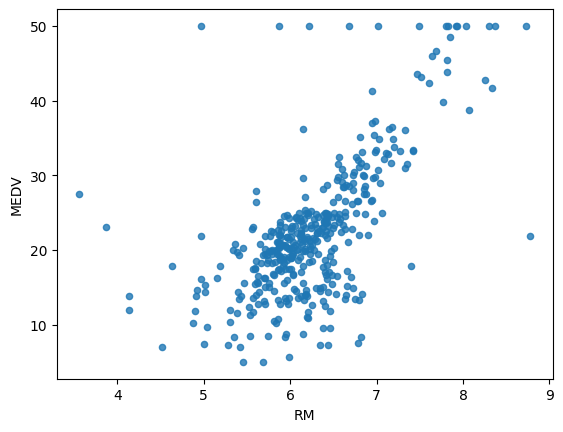

In [26]:
housing.plot(kind = "scatter", x= "RM", y="MEDV",alpha = 0.8) # now say we want to zoom into/only view the plot with rooms , alpha value is how dark we want plot to be 

Observations: why are there so many houses that even if they have a lot of rooms, their value is still 50 thousand? One of the purposes of the correlation matrix is to remove outliers from the data and find discrepancies

# Trying Out Attribute Combinations

Attribute combinations can help our data become better and more easy to understand. For example if we wanted to explore tax per room of a house, that could be a new attribute we want to explore.

In [27]:
housing["TAXRM"] = housing['TAX']/housing['RM'] #created a new attribute here which is tax per room of a house 

In [28]:
housing["TAXRM"] #now let us see what values it gave us 

254     53.607897
348     48.277850
476    125.565611
321     47.508691
326     47.180667
          ...    
154     65.507152
423    119.676550
98      37.216828
455    111.445783
215     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [29]:
housing.head() #now we can see it added our new attribute to the data 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667


In [30]:
#now let us use the same code from before to look at the new correlation matrix including our new attribute TAXRM in it 
corr_matrix = housing.corr() #pandas dataframe function (dataframe.corr) 
corr_matrix['MEDV'].sort_values(ascending=False) #correlation coefficient: if you increase one thing, will the other decrease or increase 

MEDV       1.000000
RM         0.660761
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
TAXRM     -0.506534
LSTAT     -0.739129
Name: MEDV, dtype: float64

Here we found a variable with another strong correlation which was TAXRM (tax per rooms).

<Axes: xlabel='TAXRM', ylabel='MEDV'>

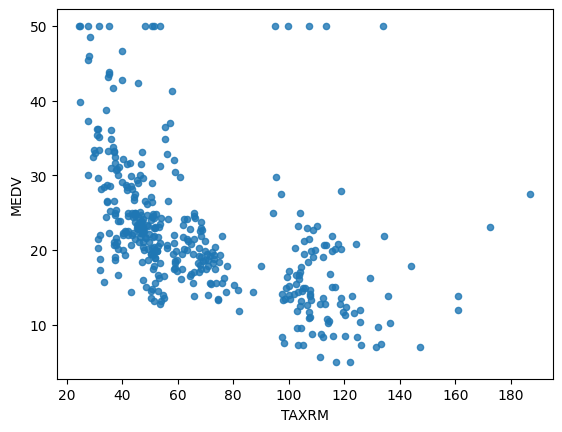

In [31]:
housing.plot(kind="scatter",x="TAXRM", y = "MEDV",alpha=0.8) #now let us plot the TAXRM variable with our MEDV price variable to see how it looks

In [32]:
#we want to separate out the features in our train set when we go to build the model using linear regression below
#here we wanted to drop the TAXRM feature we made because it could harm our model (strat_train_set is the train set without the TAXRM column)
housing = strat_train_set.drop("MEDV",axis = 1)
housing_labels = strat_train_set["MEDV"].copy() #we separated housing and housing labels here 

# Missing Attributes - An Example if we Had Missing Vals

To take care of missing attributes in our data (lets say for example we removed 5 values from the attribute RM so now it has 501 instead of 506) values, you have 3 options: 1.Get rid of the missing data points, 2.Get rid of the whole attribute , 3.Set the value to some value( 0 ,mean, or median)

In [33]:
# a= housing.dropna(subset=["RM"]) #option 1 is to drop the missing datapoints which we would use this, this happens in the copy not the actual dataframe we uploaded at the start
# a = shape

In [34]:
#housing.drop("RM",axis=1) #Option 2 we just drop the whole RM attribute itself 
#if we display the datatable now we should note that there will be no RM column anymore
#also note that the original housing dataframe will remain unchanged 

In [35]:
#option 3: compute the median of the RM attribute and replace all the missing values with the median 
#median = housing["RM"].median() #we want to get the median of the RM column using all the data 
#housing["RM"].fillna(median) #so now, we want to fill all of the missing(null/empty) values with the median so we use this function here in pandas
#our original dataframe will remain unchanged 

In [36]:
housing.shape

(404, 13)

In [37]:
housing.describe() #beofer we started filling missing attributes with the imputer 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.251631,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.688800,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.179000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [38]:
from sklearn.impute import SimpleImputer #sklearn already has a builtin function to do this and take care of these missing attributes in our data
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing) #we want it to fit in our housing data 

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [39]:
imputer.statistics_ #this will show the values that the imputer calculated, it calculated the median value as specified above

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1790e+00, 7.7500e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [40]:
# we want to make it so that for any missing values in our data, we can replace them with the median value
X = imputer.transform(housing)

In [41]:
housing_tr = pd.DataFrame(X, columns = housing.columns) #this is the new variable of the dataframe which doesn't have our missing values

In [42]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.251631,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.688800,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.179000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Basically, what we should have found is that before we did the imputer for the missing values, when we do housing.describe it would show us a lesser number of values since the missing values are still missing/empty/not counted. But after the imputer it should show us the normal amount.

## Scikit-learn Design

Scikit learn is a python library used for machine learning that offers many built in tools, we have to know how to use them for ML.
Primarily, there are 3 types of objects in scikit-learn.
1.Estimators - it estimates some parameter based on a dataset - Ex imputer (for example replacing missing vals with median)
Has a fit method and a transform method
Fit Method - fits the dataset and calculates some internal parameters based on the dataset

2.Transformers - Transform method takes input and returns output based on the learnings from fit(). Based on what we learned from the fit method, it transforms your input. It also has a convinience function called fit_transform() which fits and then transforms. 

3.Predictors - LinearRegression model is an example of a predictor. There is a fit() and predict() function. fit() fits the dataset and predict() predicts new values in the dataset. It also gives a score() function which will evaluate the predictions and tell you how well the predictions are.

## Feature Scaling 

Feature Scaling: we want all our features and attributes of the dataset to be in the same scale. For example as we can see from our histograms for rooms it starts from 1-6 rooms and then for MEDV the value price of the homes it goes up to 50.

2 Types of Feature Scaling Methods Primarily:
1. Min-max scaling (Normalization)
         (value - min)/(max - min), the scales will scale down and the values will fall between 0 and 1
          Scikit learn provides a class called MinMaxScaler
3. Standardization
          (value - mean)/ std
           Sklearn provides a class called StandardScaler for this

## Creating a Pipeline

Pipeline - let's us go back and change things if we need easily in our code like models , strategies , something to kind of automate the process

In [43]:
# let us import a pipeline from sklearn as it already gives us this
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")), #takes a list of pipelines and we can add as many as we want 
                        #.......add as many as you want in your pipeline
                        ('std_scaler',StandardScaler())])


In [44]:
housing_num_tr = my_pipeline.fit_transform(housing) #we will fit transform on our data (housing), the values of our data from the start 

In [45]:
housing_num_tr #this is a numpy array and predictors take a numpy array as the input 

array([[-0.44241248,  3.18716752, -1.12581552, ..., -0.99428207,
         0.43852974, -0.49833679],
       [-0.44320015,  1.36098896, -1.47680838, ...,  0.56613801,
         0.38242047, -0.96561983],
       [ 1.3766227 , -0.46518961,  0.99776471, ...,  0.80256529,
        -0.04255723,  1.67953595],
       ...,
       [-0.43839281, -0.46518961, -1.23595972, ..., -0.23771476,
         0.4566363 , -0.92389813],
       [ 0.11992217, -0.46518961,  0.99776471, ...,  0.80256529,
        -3.61123302,  0.85900919],
       [-0.44118424, -0.46518961,  0.37948858, ..., -0.99428207,
         0.41347532,  0.09411135]], shape=(404, 13))

In [46]:
housing_num_tr.shape

(404, 13)

So now this pipeline acts as a sort of function, we can see we put our overall data (housing) as its input and for the parameters of our pipeline, we have imputer and standard scaler so far so that means our housing data will go through this pipeline and do the imputing of the values (missing values) and then do standard scaler on it aka feature standardization. So in this way a pipeline works 

## Selecting a Desired Model for our ML House Price Prediction

In [47]:
#Let's say we select our linear regression model, now we want to fit it so we use the sklearn built in fesature to fit a model 
from sklearn.linear_model import LinearRegression #MODEL #1 that gave us a a rmse of 22.283
from sklearn.tree import DecisionTreeRegressor #MODEL #2 that we are testing this is a decision tree let us see if this gives better predictions
from sklearn.ensemble import RandomForestRegressor #MODEL #3 that we will try is random forest model 
# model = LinearRegression() #MODEL #1 we are commenting out this line for the linearRegression model and adding the new one 
# model = DecisionTreeRegressor() #MODEL #2 gave us mse of 0.0, overfitted the data = BAD
model = RandomForestRegressor() #MODEL #3 gave us a rmse scores which were the best! (check word document)
#overfitting learns the noise instead of patterns/trends and just sticks exactly to the data, we do not want this, our decision tree model fitted every single data point in the training set exactly which is bad 
model.fit(housing_num_tr,housing_labels) #the last label is the label of the columns 
#so now our linear regression model has been trained 

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [48]:
some_data = housing.iloc[:5] #taking a portion of our data, starting until lets say the 5th column

In [49]:
some_labels = housing_labels.iloc[:5] #now using the same logic, we took those labels of some portion of the data (same portion)

In [50]:
prepared_data = my_pipeline.transform(some_data) #this our prepared data that went through our pipeline

In [51]:
#now we will take some predictions using our model
model.predict(prepared_data)
#this will give us an array of predictions 

array([20.529, 27.152, 12.404, 20.868, 21.86 ])

In [52]:
list(some_labels)
# we are doing this and comparing to our predictions, is it similar? For example, first one is 20.9 predicted versus actual 21.826.

[20.9, 26.6, 12.0, 20.4, 22.2]

## Evaluating the Model Using Root Mean Squared Error 

In [53]:
from sklearn.metrics import mean_squared_error #imported the mean square error from sklearn library 
housing_predictions = model.predict(housing_num_tr) #now predict it on house num tr
mse = mean_squared_error(housing_labels, housing_predictions) #this gets us the mean squared error, but we need the root mean squared error
rmse = np.sqrt(mse) #now this is the root mean square error 


In [54]:
rmse #this is a pretty large rmse, and we could probably have a smaller rmse hence better predictions if we use a different model, so let us go back and add a new model 

np.float64(1.1731450768285776)

## Using Better Evaluation Technique - Cross Validation

In [55]:
# we will group our data into groups , if k = 10 then we will make 10 groups of our data (randomly distributed data points)
# 1 2 3 4 5 6 7 8 9 10, first we will do training on groups 2-10 and make the model based on that, and see how this model from groups 2-10 predicts on 1
# 1  3 4 5 6 7 8 9 10 , then we will remove 2 and do training on groups 1,3, and 4-10 and see the error using 2 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10) # we want 10 groups
rmse_scores = np.sqrt(-scores)

In [56]:
rmse_scores #let us look at the rmse scores now, its for the same decision tree model that we thought was 0 , we are getting better predictions than linear 

array([3.26408974, 2.57239886, 5.16673044, 2.76807179, 2.51204531,
       2.51383433, 3.3407006 , 2.8993957 , 2.02725376, 4.52011874])

In [57]:
#so now we have chosen the DecisionTreeRegressor because it performs/predicts better than our linear regression 
#lets make a function so that we can easily get the scores, mean , and the standard deviation of our cross-val scores here 
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())


In [58]:
print_scores(rmse_scores)

Scores: [3.26408974 2.57239886 5.16673044 2.76807179 2.51204531 2.51383433
 3.3407006  2.8993957  2.02725376 4.52011874]
Mean: 3.1584639264634014
Standard Deviation: 0.927773712382458


Our model with the best predictions and best rmse (lowest) was the RandomForest Regressor, so we will choose this one. 

Convert this notebook to a python file and run the pipeline using VS Code

## Saving the Model

In [62]:
#sklearn's joblib saves our model from google: Joblib is used with scikit-learn (sklearn) primarily for model persistence (saving/loading models)
from joblib import dump, load
dump(model, 'HousePricePredictionModel.joblib') #we have made the model this named it this , and this made a new file in our jupyter notebook folder 


['HousePricePredictionModel.joblib']

Now that we have chosen the model, it is time to test it, so we will create a new jupyter notebook called testing

## Testing the Model on Test Data 

In [74]:
# we have to now evaluate the model on our test data that we saved 
X_test = strat_test_set.drop("MEDV", axis = 1) # this X_test represents our test set data without the MEDV column
Y_test = strat_test_set["MEDV"].copy() #the Y_test represents our MEDV values so the prices of the house 
X_test_prepared = my_pipeline.transform(X_test) 
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final Predictions of MEDV (Price):", final_predictions)
print("Actual Values of MEDV(Price):",list( Y_test))

Final Predictions of MEDV (Price): [23.118 22.613 46.955 32.729 45.87  34.571 20.874 23.689 33.228 19.798
 18.921 28.769 21.955 32.962 20.635 20.259 13.217 20.694 28.394 19.68
 20.213 45.722 12.333 18.908 25.512 33.916 16.002 15.864  6.865 20.319
 23.658 23.252 18.014 15.025 20.929 19.124 22.383 17.336 44.418 18.415
 21.387 18.656 19.415 18.645 33.126  8.35  24.867 14.791 21.153 21.32
 46.519 24.264 15.103 21.178 19.715 46.955 33.059 20.24  33.912 10.602
 23.904 34.831 33.18  23.925 14.038 21.076 20.672 15.595 27.97  24.364
 23.129 32.317 19.432 32.259 10.757 20.403 43.614 19.705 19.237 14.186
 42.77   9.335 34.808 22.658 27.941 16.207 22.593 21.895 20.533 15.435
 26.444 10.503 32.485 12.829 26.126 20.03  33.408 13.461 20.901 21.04
 20.228]
Actual Values of MEDV(Price): [24.6, 22.0, 44.8, 23.6, 48.8, 36.5, 19.7, 23.1, 34.6, 21.5, 23.1, 15.0, 23.0, 34.9, 18.5, 10.4, 10.2, 18.9, 23.9, 19.3, 19.4, 48.3, 10.9, 19.6, 27.5, 37.3, 16.1, 15.2, 10.5, 21.4, 23.2, 20.7, 21.7, 13.0, 22.3, 19.6, 21

In [65]:
final_rmse

np.float64(3.2922348303573084)

## Using the Model / Testing it Out 

In [75]:
prepared_data[0]

array([-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.54601796, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679])

In [76]:
from joblib import dump, load
import numpy as np 
model = load('HousePricePredictionModel.joblib')

In [77]:
features = np.array([[-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.54601796, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679]])
model.predict(features) #this is the method we used to predict the model from our notebook

array([20.529])

In [78]:
#now we have predicted the price given an array of features / attributes 
#out most important feature was RM(rooms) which is the 6th feature, so if we change this we should expect the number to change as well 